# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [47]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/AndrewArgyrou/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")
type(api_key)

str

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin, BTC, btc, bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy",
)

# Show the total number of news
bitcoin_news_en["totalResults"]

2892

In [5]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum, ETH, eth, ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy",
)

# Show the total number of news
ethereum_news_en["totalResults"]

1572

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_news_en["articles"]:
    try:
        text = article["content"].lower()
        title = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({"Text": text, "Date": date, "Compound": compound, "Positive": pos, "Negative": neg, "Neutral": neu, "Title Bitcoin": title})
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Title Bitcoin","Text","Date","Compound","Negative","Neutral","Positive",]
bitcoin_df = bitcoin_df[cols]
#bitcoin_df.sort_values(by='Negative',ascending=False,inplace=True)
bitcoin_df.tail()

,Title Bitcoin,Text,Date,Compound,Negative,Neutral,Positive
95,"Bitcoin Extends Pullback; Support at $37K, Res...","bitcoin (btc) dipped below $40,000 on friday, ...",2022-04-22,0.2023,0.055,0.867,0.078
96,Bitcoin Holding Support at $40K; Resistance at...,bitcoin (btc) is attempting to break above a s...,2022-04-13,0.1280,0.061,0.864,0.075
97,Market Wrap: Cryptos Mixed as Bitcoin Trades N...,"bitcoin (btc) stabilized around the $40,00 pri...",2022-04-28,0.0000,0.000,1.000,0.000
98,Bitcoin Stabilizes at $40K Support; Resistance...,the leader in news and information on cryptocu...,2022-04-12,0.1779,0.000,0.950,0.050
99,"Bitcoin Neutral, Support at $37K and Resistanc...",bitcoin (btc) continued to bounce around the $...,2022-04-14,-0.3400,0.072,0.928,0.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_news_en["articles"]:
    try:
        text = article["content"].lower()
        title = article["title"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({"Text": text, "Date": date, "Compound": compound, "Positive": pos, "Negative": neg, "Neutral": neu, "Title Bitcoin": title})
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Title Bitcoin","Text","Date","Compound","Negative","Neutral","Positive",]
ethereum_df = ethereum_df[cols]
#ethereum_df.sort_values(by='Negative',ascending=False,inplace=True)
ethereum_df.tail()

,Title Bitcoin,Text,Date,Compound,Negative,Neutral,Positive
95,"BAYC Team Raises $285M With Otherside NFTs, Cl...","after muchado, yuga labs held its long-awaited...",2022-05-01,0.0000,0.000,1.000,0.000
96,Nvidia Stock Falls on an Analyst Downgrade -- ...,share prices of nvidia ( nvda -1.88% ) have be...,2022-04-13,-0.1531,0.106,0.833,0.061
97,Market Roundup: $APE Surges in a Bummer of a M...,april hasnt been kind to crypto. but there is ...,2022-04-28,0.0803,0.107,0.802,0.091
98,Treasury Sanctions More North Korea-Linked ETH...,u.s. government officials are throwing a wider...,2022-04-22,0.5106,0.000,0.867,0.133
99,Descending channel pattern and weak futures da...,despite bouncing from a 45-day low on april 30...,2022-05-05,0.0772,0.096,0.824,0.080


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.072027,0.042960,0.895770,0.061280
std,0.381831,0.058462,0.077123,0.056862
min,-0.757400,0.000000,0.608000,0.000000
25%,-0.177900,0.000000,0.848750,0.000000
50%,0.128000,0.000000,0.908000,0.052500
75%,0.340000,0.067250,0.950000,0.086500
max,0.838700,0.224000,1.000000,0.240000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.142722,0.042480,0.879240,0.078290
std,0.409406,0.056209,0.084077,0.067641
min,-0.784500,0.000000,0.635000,0.000000
25%,-0.153100,0.000000,0.828500,0.026250
50%,0.177900,0.000000,0.886500,0.072000
75%,0.430825,0.066000,0.936000,0.113250
max,0.893400,0.231000,1.000000,0.332000


### Questions:

**Q: Which coin had the highest mean positive score?**

A: Ethereum had the highest positive mean score of 0.081 compared to Bitcoin's 0.062.

**Q: Which coin had the highest compound score?**

A: Ethereum had the highest compound max score of 0.89 compared to Bitcoin's 0.84. Additionally, Ethereum had a higher mean compound score of 0.19 compared to Bitcoin's 0.07

**Q. Which coin had the highest positive score?**

A: Ethereum had a higher max positive score of 0.33 compared to Bitcoin's 0.24.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [12]:
# Complete the tokenizer function
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the stop words
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]


    # Convert the words to lowercase
    tokens = [word.lower() for word in words if word.lower() not in sw]
    
    
    return tokens

In [13]:
# Create a new tokens column for Bitcoin
bitcoin_df["Tokens"] = bitcoin_df["Text"].apply(tokenizer)
bitcoin_df.head()

,Title Bitcoin,Text,Date,Compound,Negative,Neutral,Positive,Tokens
0,Miami’s Bitcoin Conference Left a Trail of Har...,"now, even though there are a number of women-f...",2022-05-10,0.0772,0.000,0.964,0.036,"[even, though, number, womenfocused, crypto, s..."
1,"Bitcoin, Ethereum Technical Analysis: BTC Slip...","btc fell to its lowest level since last july, ...",2022-05-09,0.1027,0.066,0.859,0.076,"[btc, fell, lowest, level, since, last, july, ..."
2,"The crypto crash, in 10 charts",as the cryptocurrency market burns through its...,2022-05-12,-0.4019,0.170,0.727,0.103,"[cryptocurrency, market, burns, worst, crash, ..."
3,3 Reddit Stocks That Could Roar in Q2,<ul><li>elon musk will be able to focus on tes...,2022-04-19,0.4404,0.000,0.921,0.079,"[ullielon, musk, able, focus, onteslatsla, pro..."
4,"Bitcoin, cryptocurrency shed $200 billion in o...",contagion spreading to stock markets as invest...,2022-05-12,-0.5667,0.173,0.757,0.070,"[contagion, spreading, stock, markets, investo..."


In [14]:
# Create a new tokens column for Ethereum
ethereum_df["Tokens"] = ethereum_df["Text"].apply(tokenizer)
ethereum_df.head()

,Title Bitcoin,Text,Date,Compound,Negative,Neutral,Positive,Tokens
0,US blames North Korean hacker group for $625 m...,the us department of treasury says lazarus is ...,2022-04-14,-0.7845,0.231,0.681,0.088,"[us, department, treasury, says, lazarus, behi..."
1,"Bitcoin, Ethereum Technical Analysis: BTC Slip...","btc fell to its lowest level since last july, ...",2022-05-09,0.1027,0.066,0.859,0.076,"[btc, fell, lowest, level, since, last, july, ..."
2,Yuga Labs apologises after sale of virtual lan...,a multi-billion dollar cryptocurrency company ...,2022-05-02,-0.2263,0.075,0.879,0.046,"[multibillion, dollar, cryptocurrency, company..."
3,How Bored Ape Yacht Club Broke Ethereum - CNET,when bored ape yacht club creators yuga labs a...,2022-05-04,-0.2732,0.055,0.945,0.000,"[bored, ape, yacht, club, creators, yuga, labs..."
4,How the BAYC metaverse mint raised Ethereum ga...,if you ever wanted to buy an nft based on ethe...,2022-05-02,-0.1027,0.036,0.964,0.000,"[ever, wanted, buy, nft, based, ethereum, woul..."


In [52]:
all_btc_tokens = bitcoin_df['Tokens'].sum()
len(all_btc_tokens)


1907

In [54]:
all_eth_tokens = ethereum_df['Tokens'].sum()
len(all_eth_tokens)

1970

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [55]:
from collections import Counter
from nltk import ngrams

In [56]:
# Generate the Bitcoin N-grams where N=2
btc_bigrams = Counter(ngrams(all_btc_tokens, n=2))
print(dict(btc_bigrams.most_common(10)))

{('bitcoin', 'btc'): 30, ('chars', 'bitcoin'): 25, ('leader', 'news'): 10, ('news', 'information'): 10, ('information', 'cryptocurrency'): 10, ('cryptocurrency', 'digital'): 10, ('digital', 'assets'): 10, ('assets', 'future'): 10, ('chars', 'leader'): 8, ('future', 'money'): 8}


In [57]:
# Generate the Ethereum N-grams where N=2
eth_bigrams = Counter(ngrams(all_eth_tokens, n=2))
print(dict(eth_bigrams.most_common(10)))

{('ethereum', 'eth'): 10, ('yacht', 'club'): 6, ('yuga', 'labs'): 6, ('chars', 'us'): 6, ('north', 'korean'): 5, ('bored', 'ape'): 5, ('ape', 'yacht'): 5, ('cryptocurrency', 'market'): 5, ('chars', 'happenedthe'): 5, ('us', 'treasury'): 4}


In [58]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [60]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_tokens = token_count(all_btc_tokens, N=10)
btc_top_tokens

[('chars', 100),
 ('bitcoin', 56),
 ('btc', 42),
 ('cryptocurrency', 38),
 ('market', 18),
 ('price', 17),
 ('crypto', 14),
 ('news', 14),
 ('digital', 13),
 ('assets', 13)]

In [61]:
# Use token_count to get the top 10 words for Ethereum
eth_top_tokens = token_count(all_eth_tokens, N=10)
eth_top_tokens

[('chars', 100),
 ('ethereum', 29),
 ('cryptocurrency', 24),
 ('crypto', 22),
 ('eth', 18),
 ('market', 17),
 ('cryptocurrencies', 15),
 ('us', 14),
 ('nft', 12),
 ('digital', 12)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [62]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

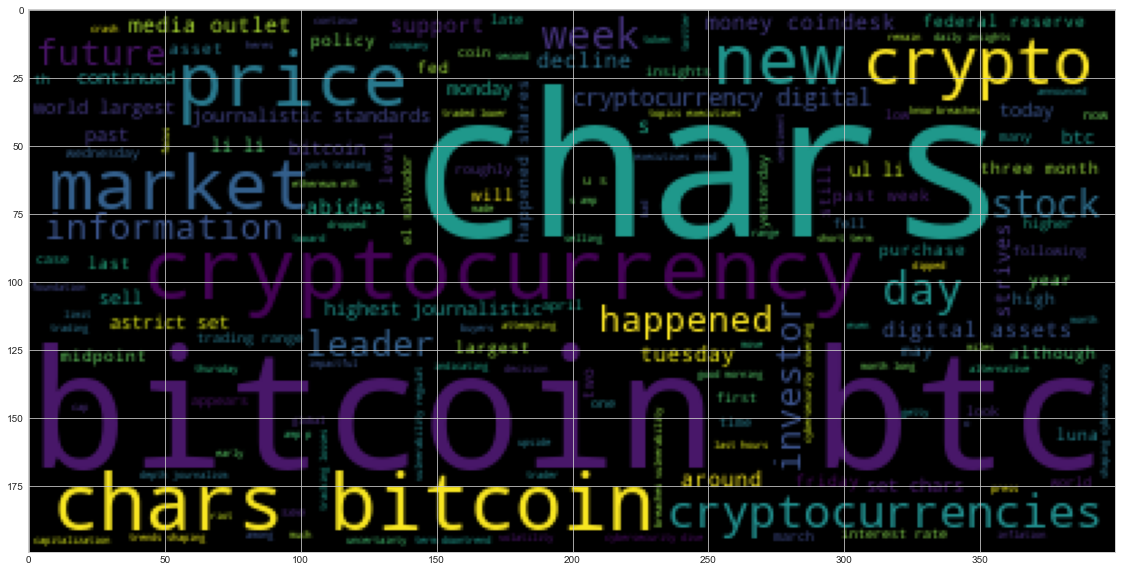

In [66]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(bitcoin_df["Text"].sum())
plt.imshow(btc_wc)

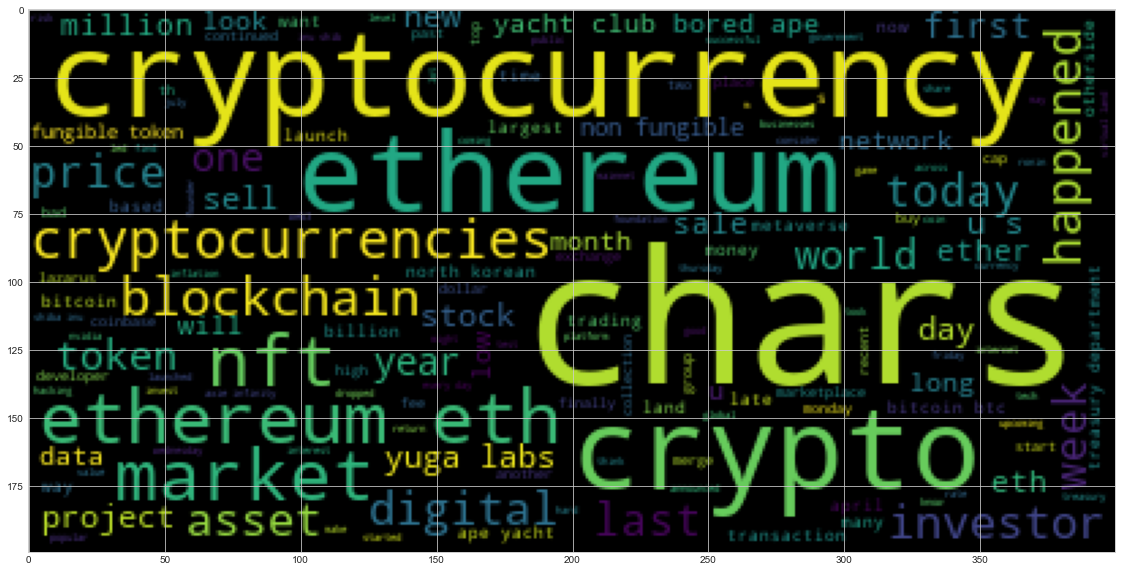

In [67]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(ethereum_df["Text"].sum())
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [68]:
import spacy
from spacy import displacy

In [69]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [71]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [73]:
# Concatenate all of the Bitcoin text together
btc_text = ' '.join(bitcoin_df["Text"])

In [74]:
# Run the NER processor on all of the text
doc_btc = nlp(btc_text)

# Add a title to the document
doc_btc.user_data['title'] = 'Bitcoin Article Entities'

In [75]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [76]:
# List all Entities
doc_btc.ents

(last july,
 33,000,
 the week,
 last week,
 fed,
 years,
 winter,
 twtr,
 aapl,
 $20 billion,
 this year,
 one,
 reuters,
 fidelity,
 fidelity,
 the last day,
 21 million,
 one,
 el salvador,
 the past week,
 tuesday,
 el salv,
 daily,
 daily,
 diamond,
 bitc,
 daily,
 luna,
 96%,
 the last 24 hours,
 mark cuban,
 over 5,700,
 2021,
 more than 2,000,
 the first two months of 2022,
 -5.03%,
 the last 24 hours,
 -2.45%,
 roughly 4.5%,
 2:02 p.m.,
 yesterday,
 federal reserve,
 almost a month,
 wednesday,
 as much as 8.4%,
 microstrategy(mstr -25.55%,
 more than 25%,
 monday,
 bitcoin(btc -9.70%,
 over 9%,
 monday,
 roughly $3,
 two,
 2.72%,
 2.52%,
 late wednesday afternoon,
 roughly 4:30 p.m.,
 tuesday,
 u.s.,
 tomorrow,
 fed,
 50,
 4.03%,
 eth 4.58%,
 1.14%,
 warren buffett,
 the federal reserve's,
 wednesday,
 $9 trillion,
 close to $40,000,
 today,
 today,
 40,000,
 a rough week,
 monday,
 morning,
 april 27,
 the central african republic's,
 2.76%,
 today,
 -5.72%,
 the weekend,
 +

---

### Ethereum NER

In [77]:
# Concatenate all of the Ethereum text together
eth_text = ' '.join(ethereum_df["Text"])

In [78]:
# Run the NER processor on all of the text
doc_eth = nlp(eth_text)

# Add a title to the document
doc_eth.user_data['title'] = 'Ethereum Article Entities'

In [79]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [80]:
# List all Entities
doc_eth.ents

(treasury,
 us treasury department,
 north korean,
 $625 million,
 last july,
 33,000,
 the week,
 last week,
 fed,
 yuga labs,
 april 30,
 last week,
 first,
 a year and a half ago,
 dan robinson,
 konstantopoulos',
 august 20,
 north korean,
 thursday,
 saturday,
 one,
 reuters,
 daily,
 the u.s. department of justice,
 two,
 european,
 north korean,
 2019,
 one,
 30,
 years,
 winter,
 thousands of dollars,
 blockchai,
 one,
 north korea,
 $540 million,
 last month,
 thursday,
 2022,
 first,
 today,
 $1.5 million,
 #59906’,
 eighth,
 2022,
 july 19,
 july 20 - 28,
 today,
 2018,
 $672 billion,
 +4563,
 mark cuban,
 2015,
 june,
 u.s.,
 sec,
 $5.5 million,
 2018,
 all day,
 wev,
 fidelity,
 fidelity,
 today,
 monday,
 today,
 bayc,
 two,
 eth -0.92%,
 -0.29%,
 friday,
 late afternoon,
 two,
 2.72%,
 2.52%,
 late wednesday afternoon,
 roughly 4:30 p.m.,
 0.21%,
 1.41%,
 the last few years,
 one,
 a rough week,
 monday,
 morning,
 0.12%,
 5,500%,
 the past five years,
 bitcoin(crypto,
 

---